# EE 580 Lab 2
### Eric D. Stevens
### February 21, 2019

In [1]:
'''This notebook was written using python 3.6, please use and up to date matplotlib version'''

%matplotlib notebook
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## Utilities

### Plotting functions

In [2]:


def mag_phase_plot(H_w, axis, seperate=False, phase_off=False):

    mag = np.abs(H_w).astype('float32')
    phase = np.angle(H_w).astype('float32')
    
    fig, ax1 = plt.subplots()
    ax1.plot(axis, mag)
    ax1.set_xlabel('Frequency')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Magnitude |H(w)|', color='b')
    ax1.tick_params('y', colors='b')

    if not seperate  and not phase_off:
        ax2 = ax1.twinx()
        ax2.plot(axis, phase, 'r')
        ax2.set_ylabel('Phase <H(w)', color='r')
        ax2.tick_params('y', colors='r')

        fig.tight_layout()
        
    plt.show()
    
    if seperate:
        fig, ax1 = plt.subplots()
        ax1.plot(axis, phase, 'r')
        ax1.set_ylabel('Phase <H(w)', color='r')
        ax1.tick_params('y', colors='r')
        fig.tight_layout()
        plt.show()
        

def time_plot(mag):

    fig, ax1 = plt.subplots()
    ax1.plot(mag)
    ax1.set_xlabel('Time (samples)')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Magnitude |h(n)|', color='b')
    ax1.tick_params('y', colors='b')

    fig.tight_layout()
    plt.show()



## Part 1: Signal Analysis

### Basic signals

### 1. $ \delta(n) $

<IPython.core.display.Javascript object>


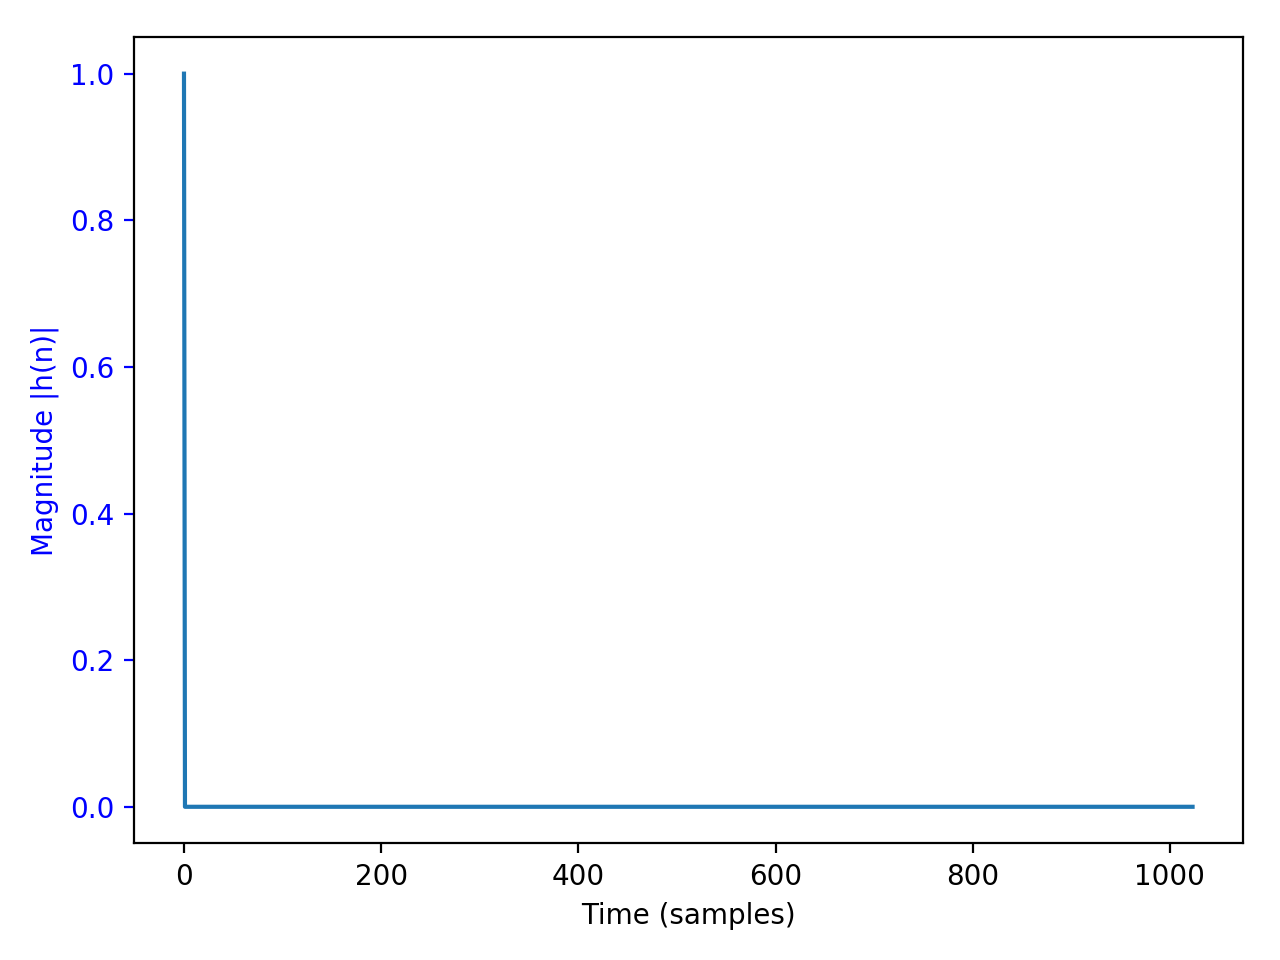

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


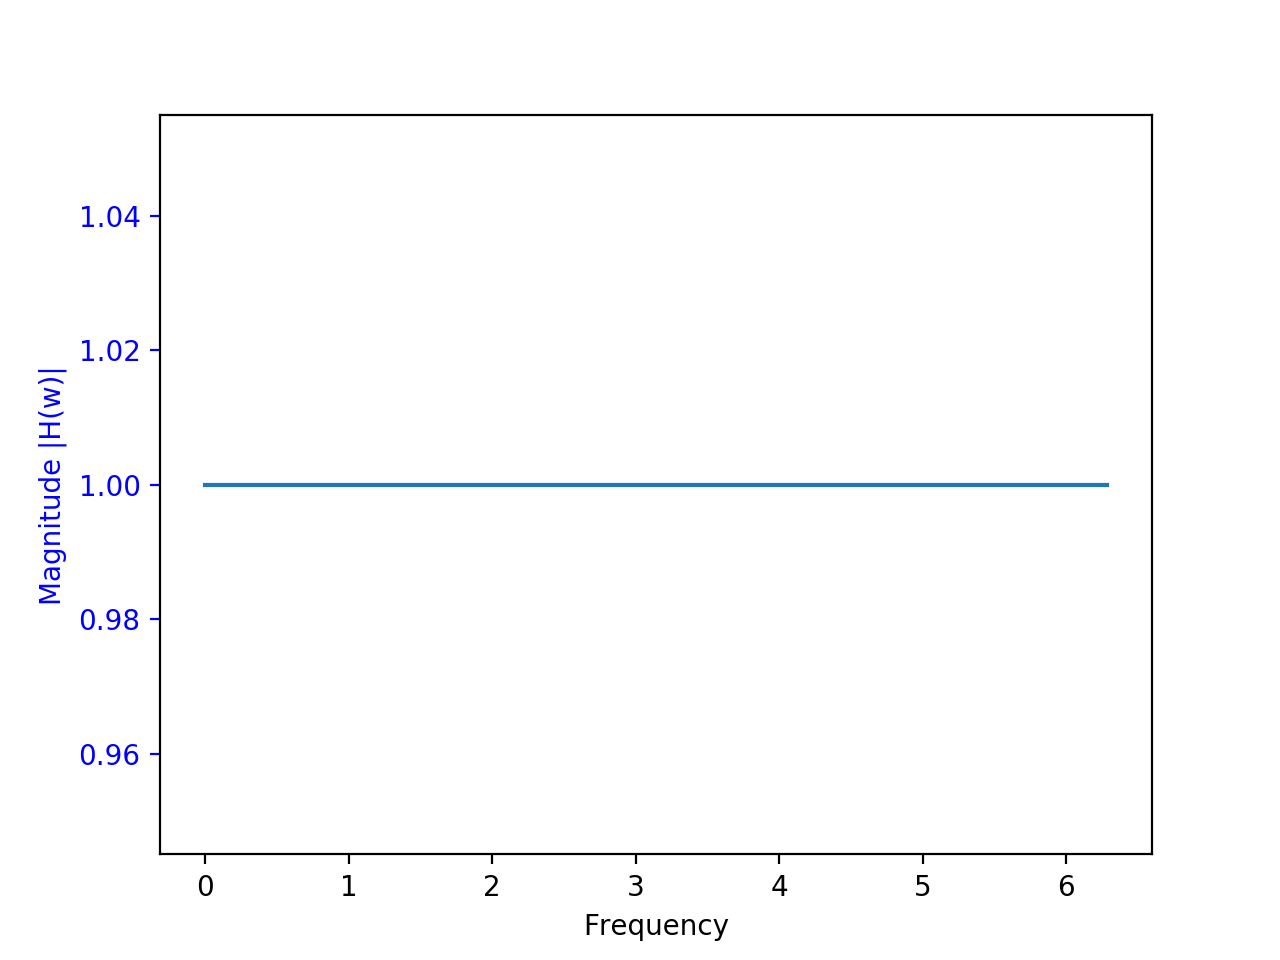

<IPython.core.display.Javascript object>


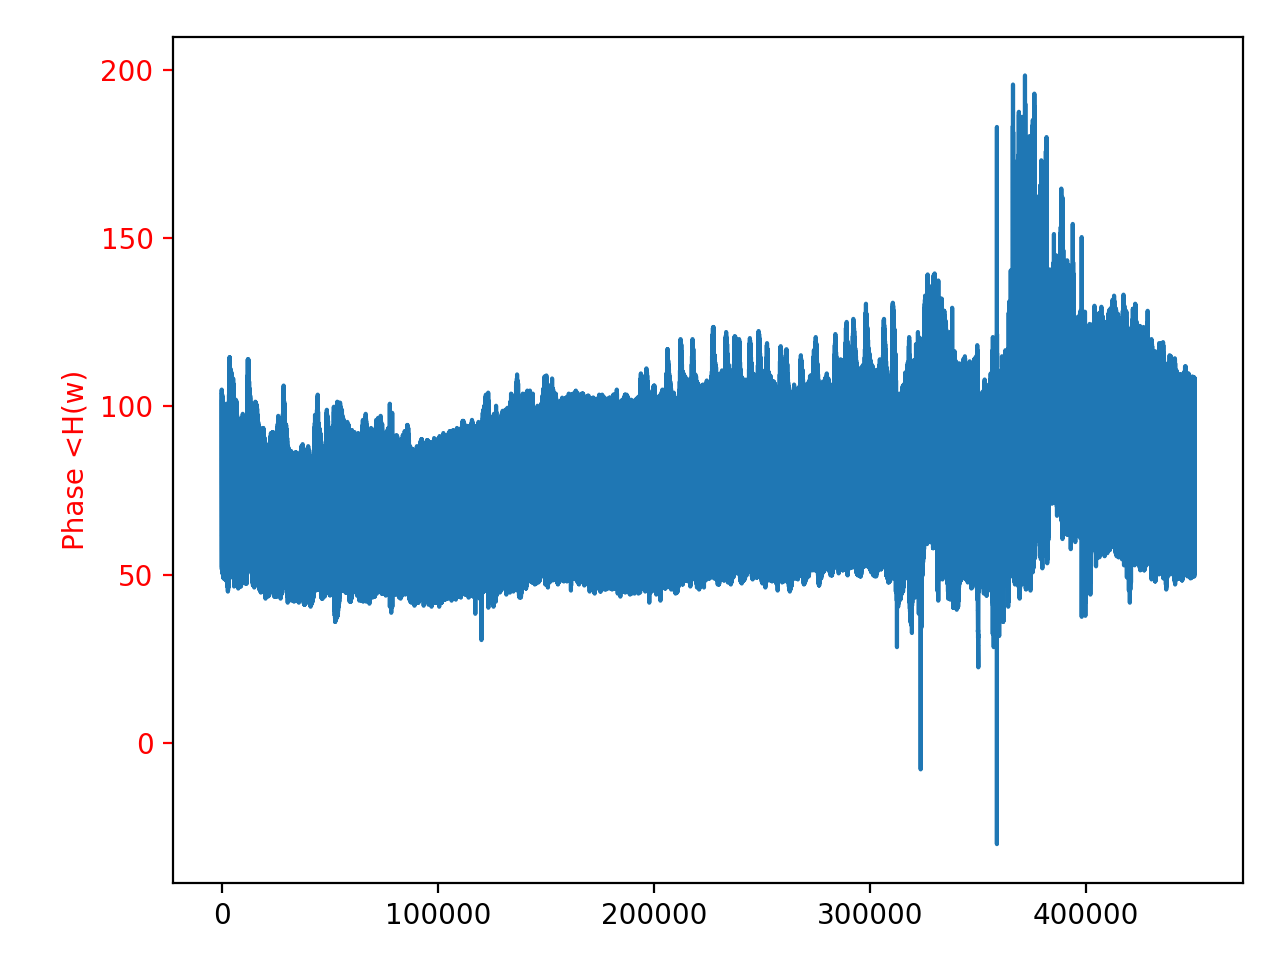

In [3]:
from scipy.signal import unit_impulse

# build the time domain axis
time_axis = np.arange(2**10)

# generate the time domain signal
x_n = unit_impulse(len(time_axis))

# plot the time domain signal
time_plot(x_n)

# build the frequency domain axis
freq_axis = np.linspace(0, 2*np.pi, len(time_axis))

# get the FFT of the time domain signal 
X_K = fft(x_n)

# plot the frequency domain signal (magnitude and phase, see utilities)
mag_phase_plot(X_K.astype('float32'), freq_axis, seperate=True)

### 2. $\delta(n-5)$

<IPython.core.display.Javascript object>


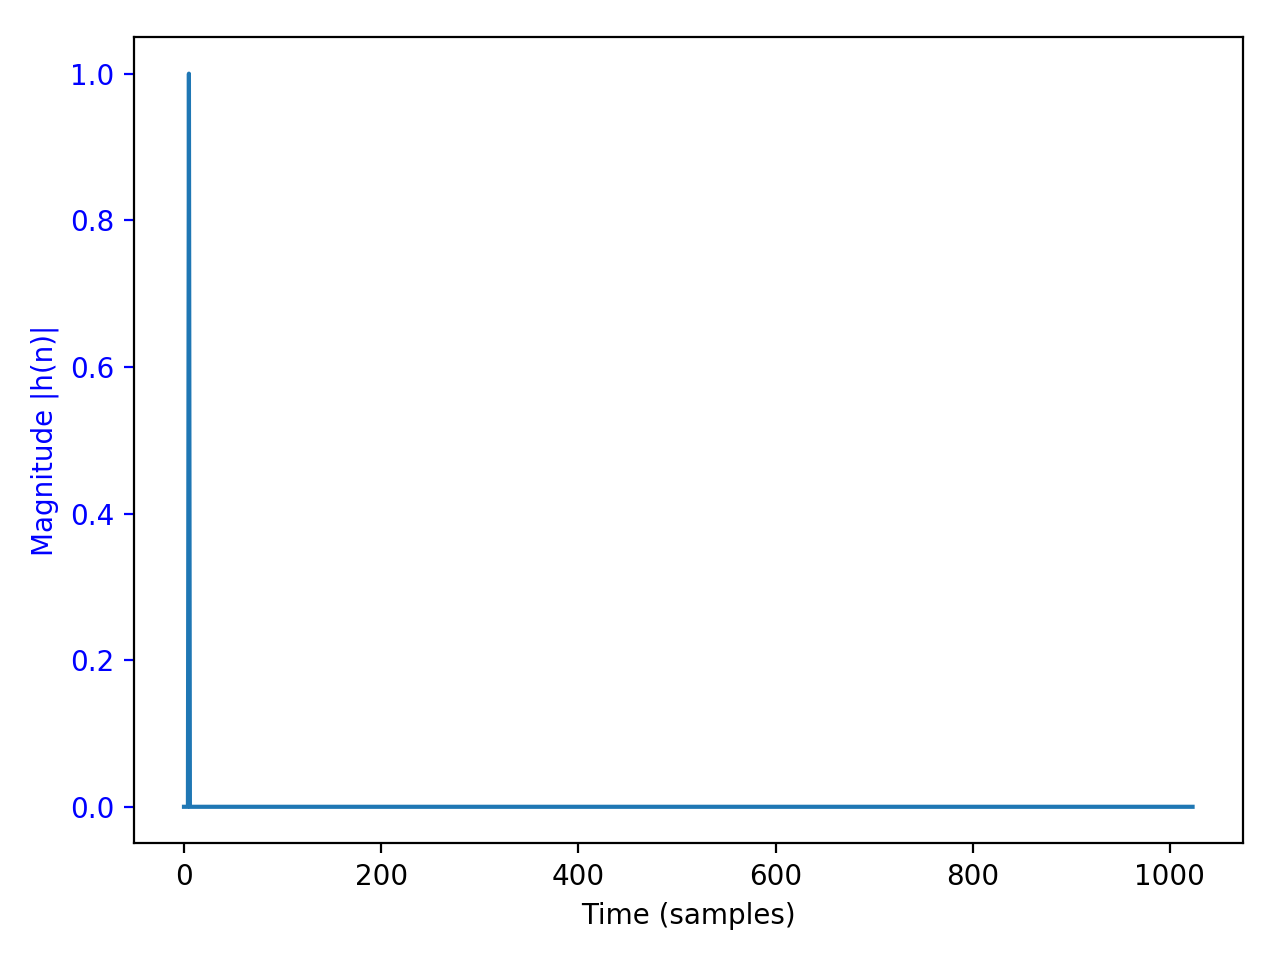

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


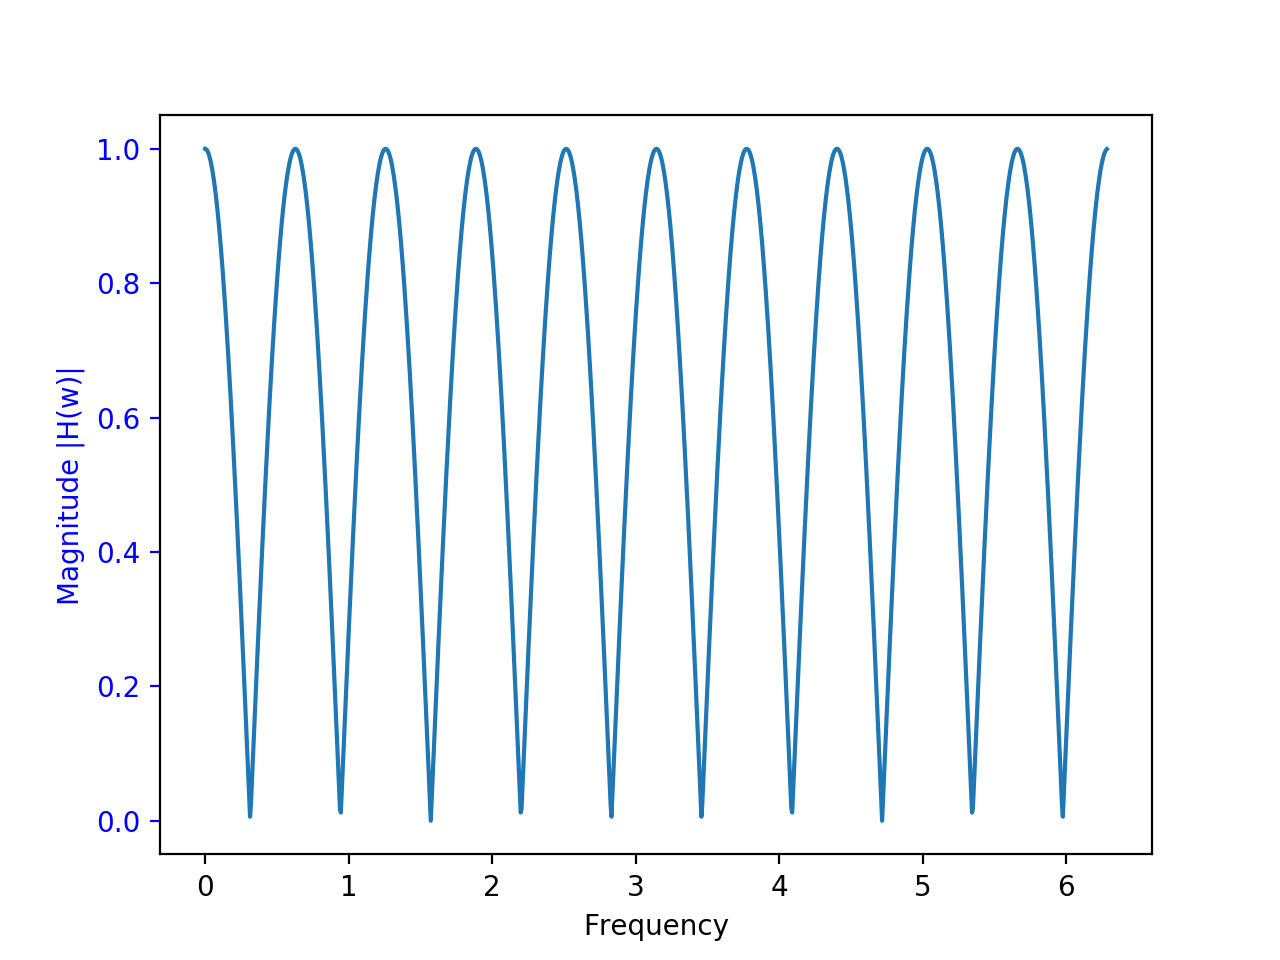

<IPython.core.display.Javascript object>


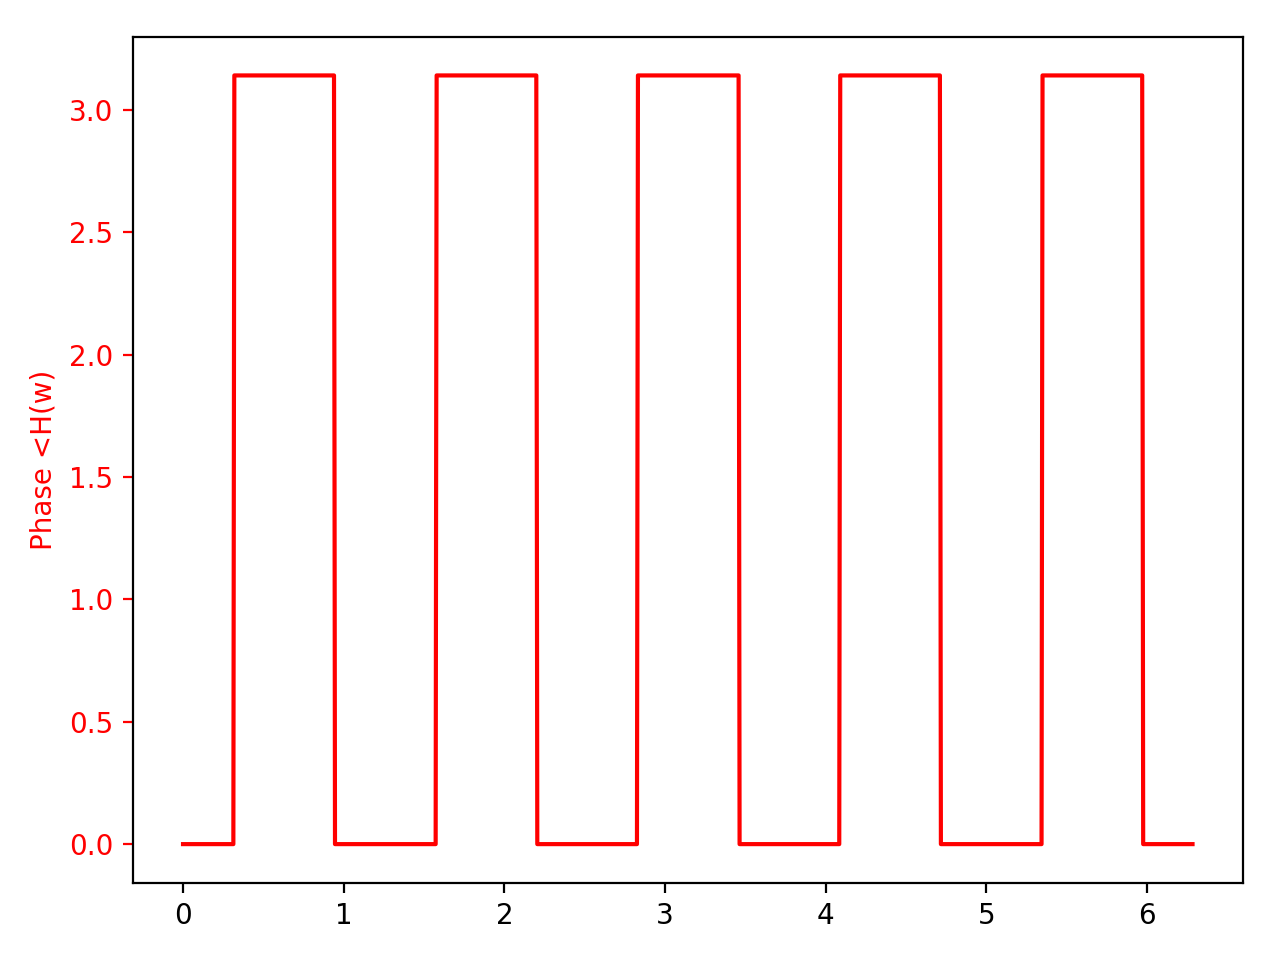

In [4]:
from scipy.signal import unit_impulse

# build the time domain axis
time_axis = np.arange(2**10)

# generate the time domain signal, shift delta by 5
x_n = unit_impulse(len(time_axis), idx=5)

# plot the time domain signal
time_plot(x_n)

# build the frequency domain axis
freq_axis = np.linspace(0, 2*np.pi, len(time_axis))

# get the FFT of the time domain signal 
X_K = fft(x_n)

# plot the frequency domain signal (magnitude and phase, see utilities)
mag_phase_plot(X_K.astype('float32'), freq_axis, seperate=True)

### 3. $u(n)$

<IPython.core.display.Javascript object>


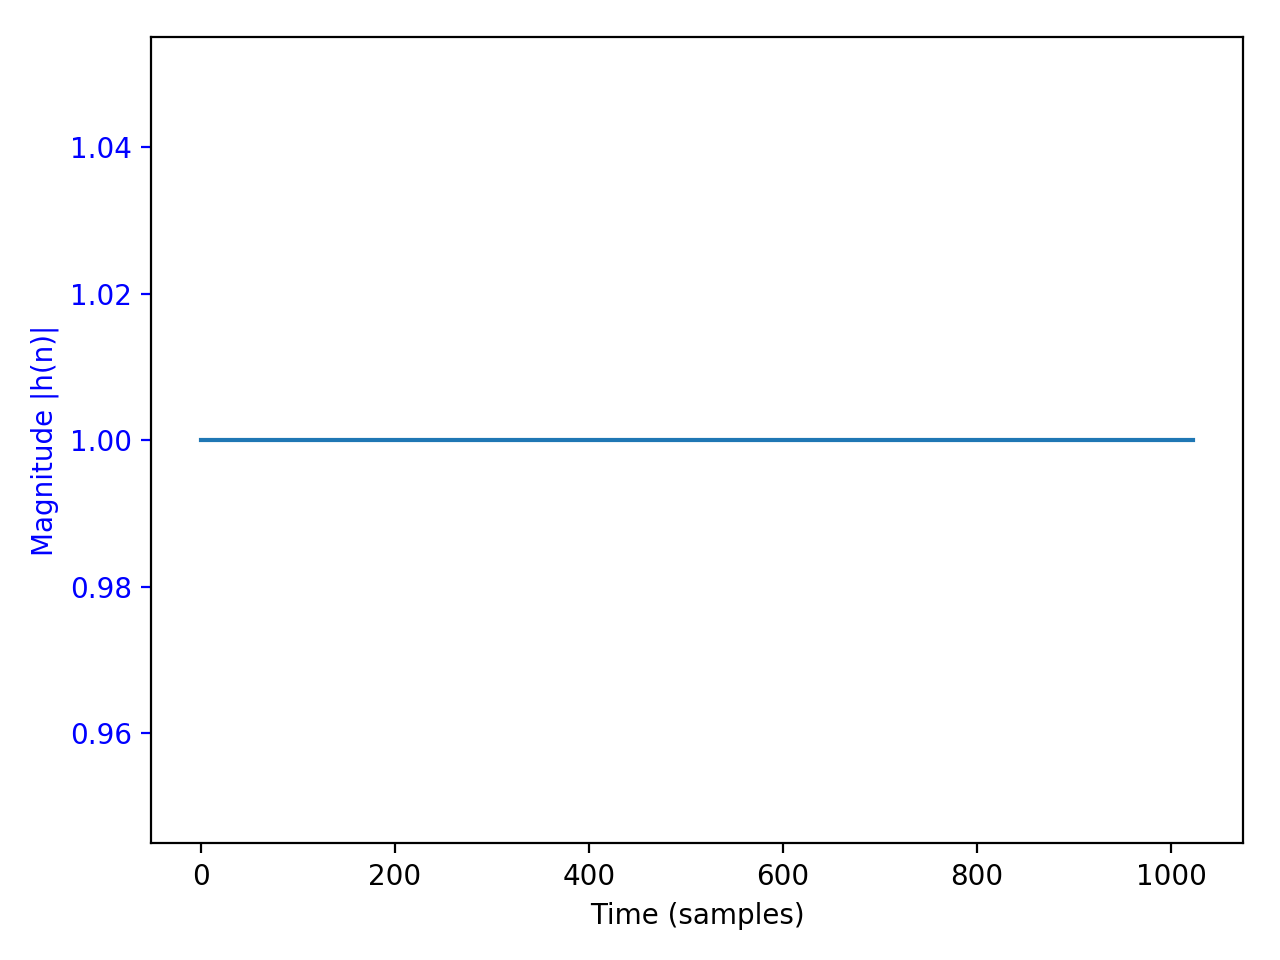

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


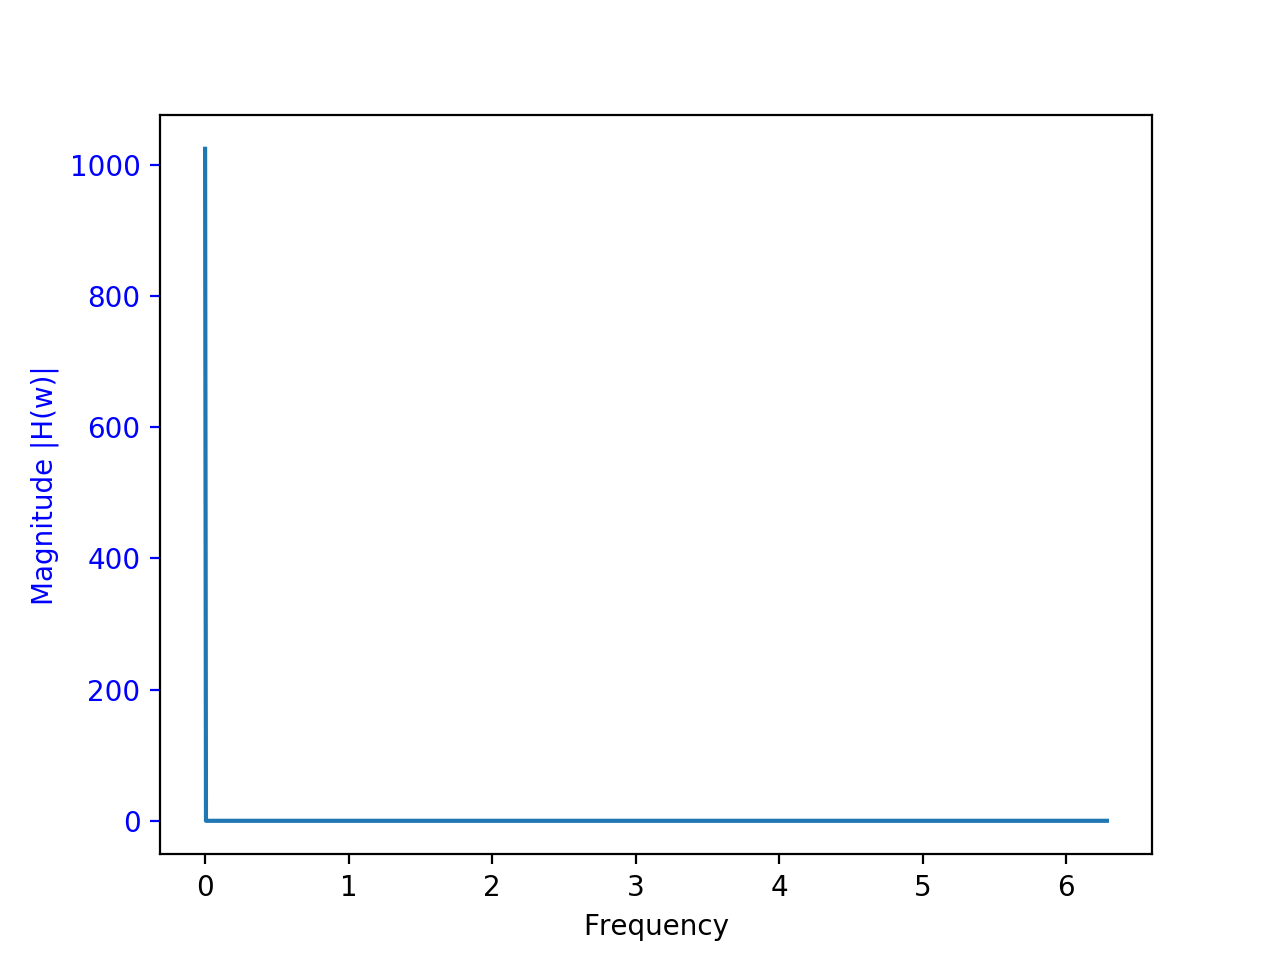

<IPython.core.display.Javascript object>


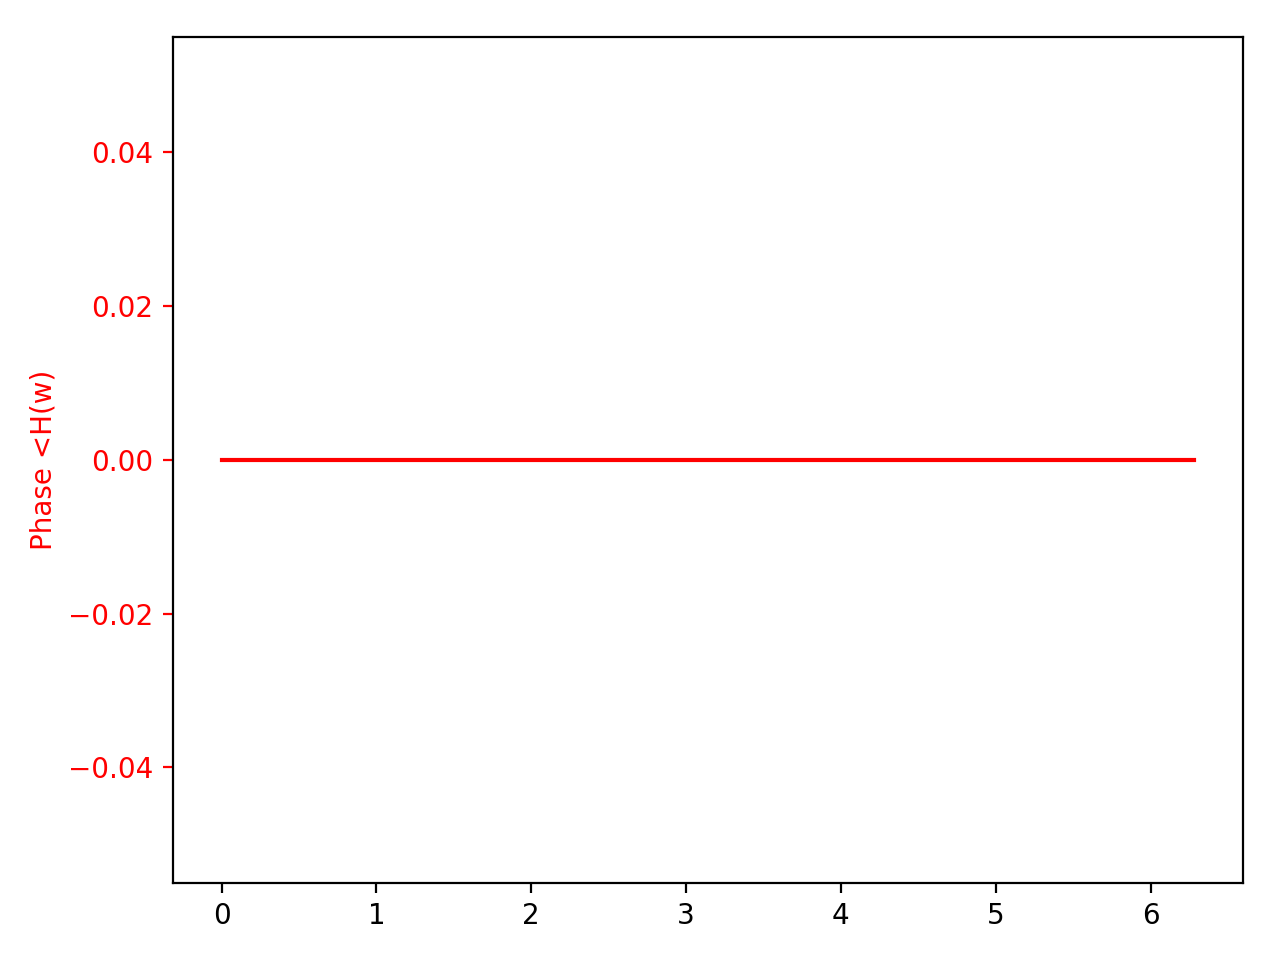

In [5]:
# build the time domain axis
time_axis = np.arange(2**10)

# generate the time domain signal, shift delta by 5
x_n = np.ones_like(time_axis)

# plot the time domain signal
time_plot(x_n)

# build the frequency domain axis
freq_axis = np.linspace(0, 2*np.pi, len(time_axis))

# get the FFT of the time domain signal 
X_K = fft(x_n)

# plot the frequency domain signal (magnitude and phase, see utilities)
mag_phase_plot(X_K.astype('float32'), freq_axis, seperate=True)

### Comparing and contrasting

In this section we examined the differences between a few common time domain signals and their respective Fourier transforms. Comparing the first signal, $\delta(n)$, to the second signal, $\delta(n-5)$, we see that in the time domain they appear to be very similar. They are both unit impulse functions, and since our time domain is so long it is difficult to see that the second signal is shifted 5 samples to the right. When examining the signals in the frequency domain however we see dramatically different behavior. The unit impulse at the origin results in a unit constant across all frequencies while the shifted impulse has a much more complicated spectrum. This is because a shifting in the time domain results in a multiplication of the frequency domain values with the complex sinusoid $e^{-j\omega k }$, resulting in the sinusoidal nature of the magnitude plot.

The comparison to parts 1 and 3 is a slightly different comparison. They are each others Fourier transforms. This is because the third signal, $u(n)$, is actually seen as a DC signal, since its activation time, $n=0$, is the first coordinate we see. A DC signal will only have magnitude where $\omega = 0$ and therefore, its Fourier transform will be an impulse at the origin. As discussed in the previous paragraph, $\delta(n)$ will have a constant that runs across the entire frequency range, making it a unit step in the frequency domain.

### Signals as transfer functions

Each of the above signals can be considered a transfer function and take the place of $H(\omega)$ in a system. In this case they would all have different behavior. In the case of $\delta(n)$ the resulting convolution would not change anything about the signal. In other words $y(n) = x(n)$ if the system is implemented. The second function, $\delta(n-5)$ would result in the input signal being delayed by 5 samples. The result would be $y(n) = x(n-5)$. Finally, the step function $u(n)$ when convolved with the input signal would work as a integrator. The resulting signal can be expressed as $y(n) = \sum_{m=0}^{n} x(n)$.

### The sinusoids

### 4. $2cos(2\pi*20Hz*n)$

<IPython.core.display.Javascript object>


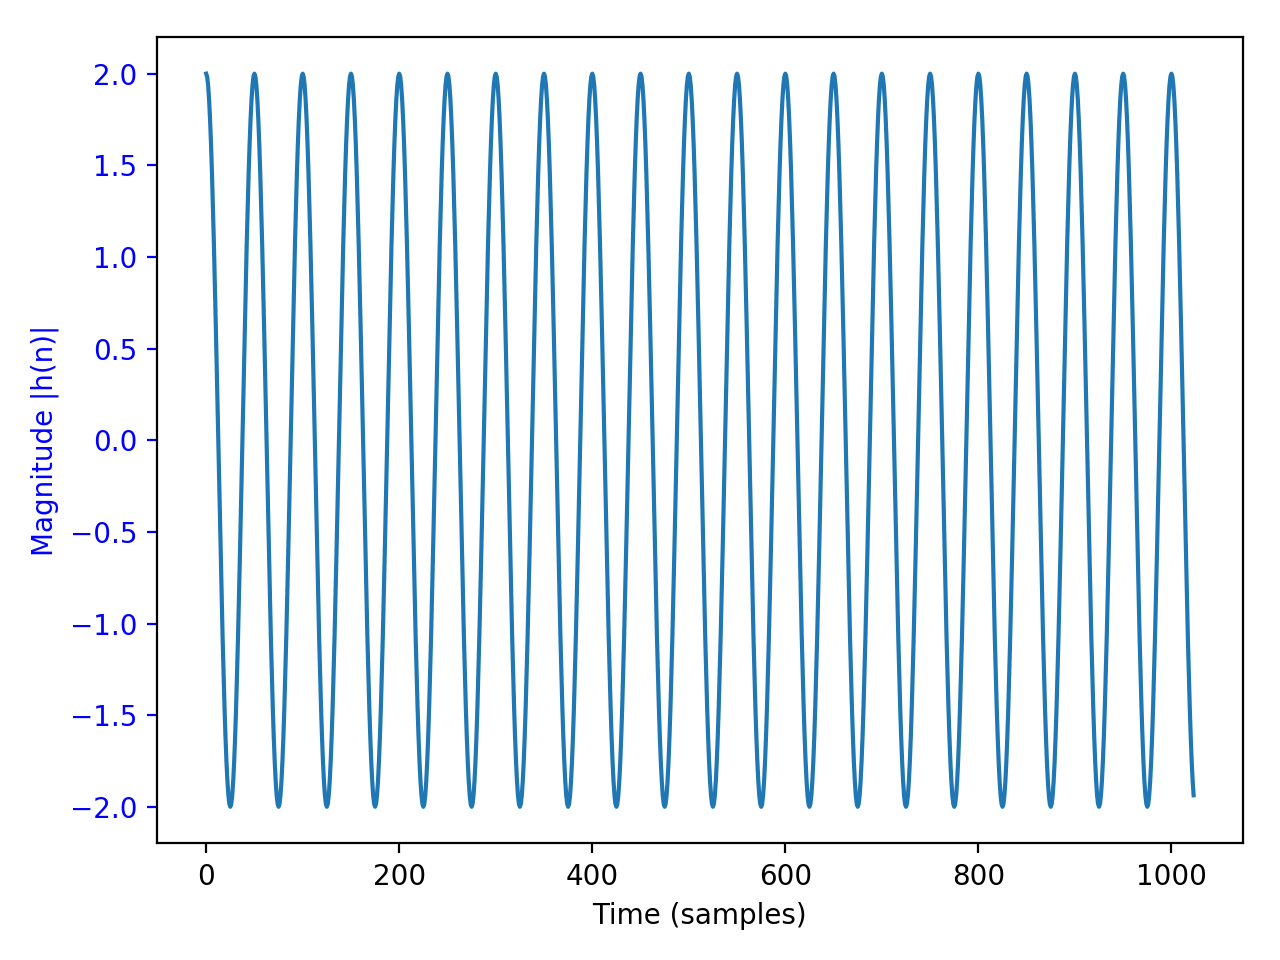

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


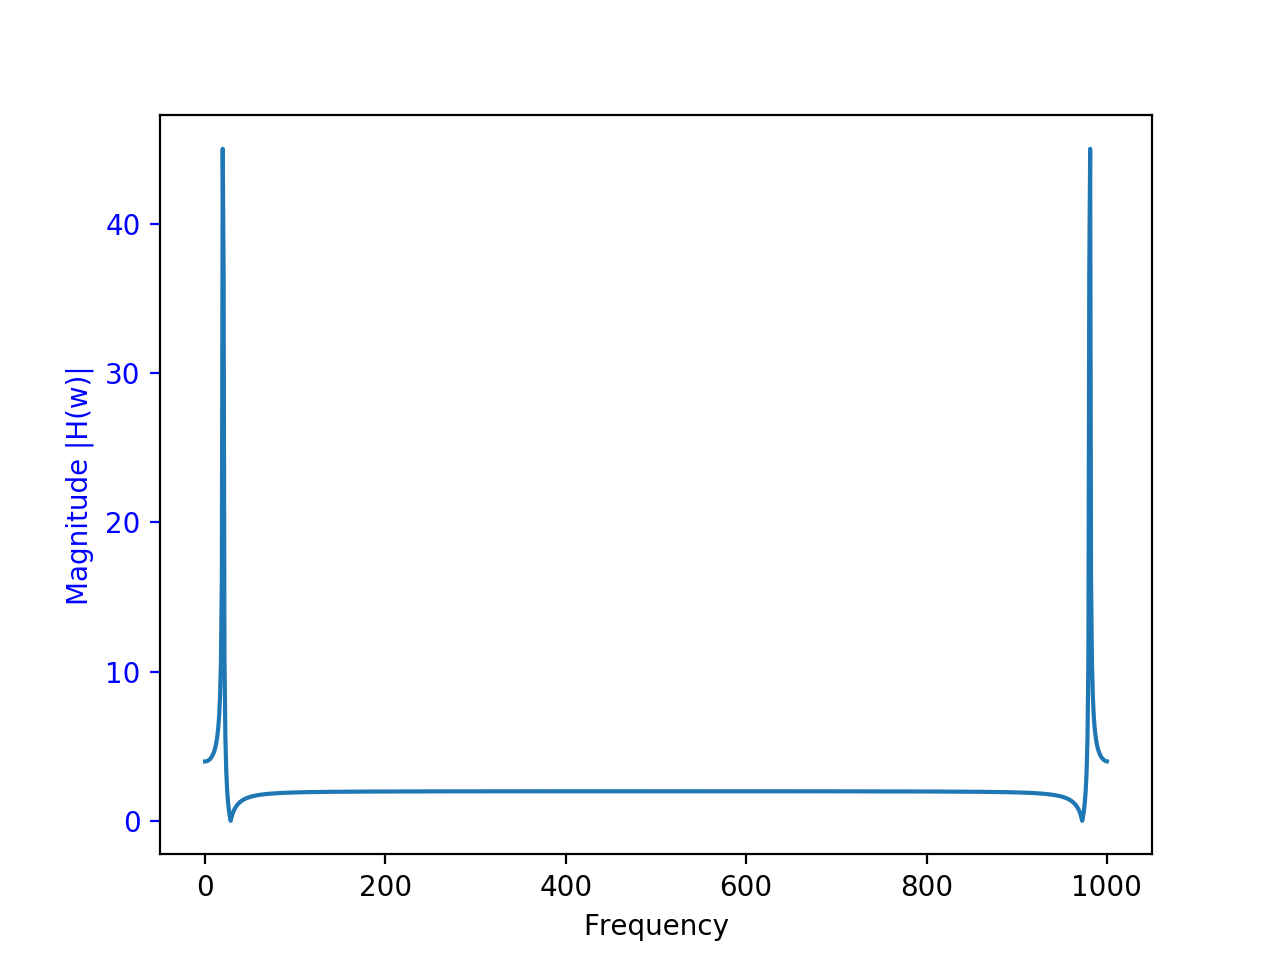

In [6]:
# build the time domain axis
time_axis = np.arange(2**10)

# declare sampling frequency and cycles/sec of sinusoid
fs = 1000
hz = 20

# build radians axis
rads_axis = time_axis*(2*np.pi*(float(hz)/float(fs)))

# generate the time domain signal, cosine based on radian axis
x_n = 2*np.cos(rads_axis)

# plot the time domain signal
time_plot(x_n)

# build the frequency domain axis
freq_axis = np.linspace(0, fs, len(time_axis))

# get the FFT of the time domain signal 
X_K = fft(x_n)

# plot the frequency domain signal (magnitude and phase, see utilities)
mag_phase_plot(X_K.astype('float32'), freq_axis, phase_off=True)

### 5. $ 4cos(2\pi*10Hz*n) + 2cos(2\pi*20Hz*n) + cos(2\pi*40Hz*n) + 0.5cos(2\pi*80Hz*n) $

<IPython.core.display.Javascript object>


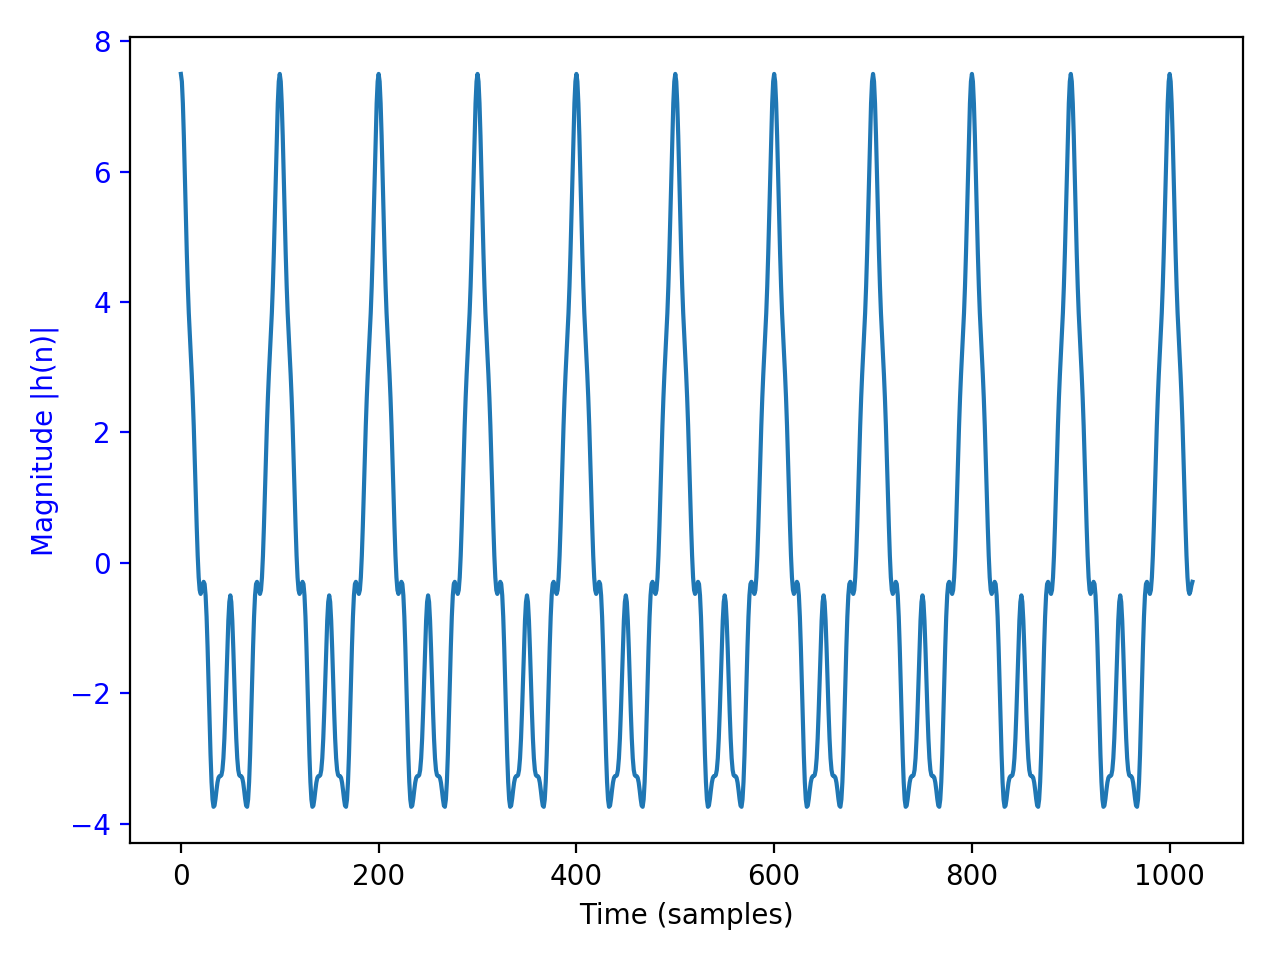

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


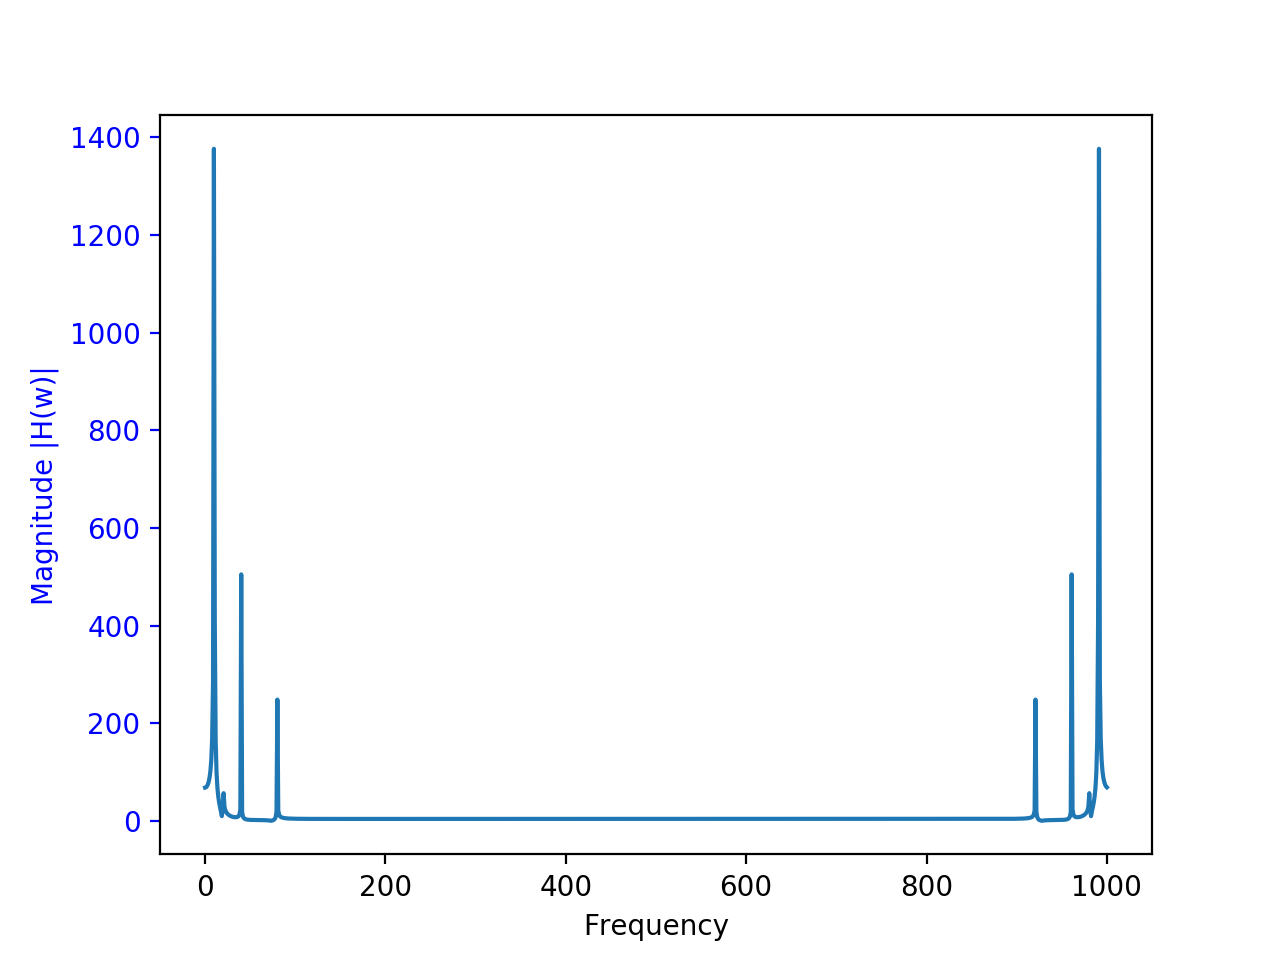

In [7]:
# build the time domain axis
time_axis = np.arange(2**10)

# declare sampling frequency and cycles/sec of sinusoid
fs = 1000

hz1 = 10
hz2 = 20
hz3 = 40
hz4 = 80

# build radians axis
rads_axis1 = time_axis*(2*np.pi*(float(hz1)/float(fs)))
rads_axis2 = time_axis*(2*np.pi*(float(hz2)/float(fs)))
rads_axis3 = time_axis*(2*np.pi*(float(hz3)/float(fs)))
rads_axis4 = time_axis*(2*np.pi*(float(hz4)/float(fs)))

# generate the time domain signal, cosine based on radian axis
x_n = 4*np.cos(rads_axis1)+2*np.cos(rads_axis2)+np.cos(rads_axis3)+(0.5)*np.cos(rads_axis4)

# plot the time domain signal
time_plot(x_n)

# build the frequency domain axis
freq_axis = np.linspace(0, fs, len(time_axis))

# get the FFT of the time domain signal 
X_K = fft(x_n)

# plot the frequency domain signal (magnitude and phase, see utilities)
mag_phase_plot(X_K.astype('float32'), freq_axis, phase_off=True)

### Observations

In the above plots we can see that the single sinusoid plots very clearly. The frequency domain chart specifies a signal occouring right at the expected frequency. On the other hand, in our second graph, the signal at 20 Hz seems to be getting masked by the higher amplitude sinusoid at 10 Hz. This was unexpected and I can't really explain it.

## Part 2: Blood Pressure

### Format Data

The first step of this process will be to extract the numerical data from the text file. We will use a small script to do this and then plot the result to ensure that we are getting appropriate looking data.

In [8]:
with open('project2_data_csv.txt') as file:
    file_string = file.read()

values = file_string.split('\n')
float_values = []
for string in values:
    try:
        float_values.append(float(string))
    except:
        continue

In [9]:
plt.figure(3)
plt.plot(float_values)


### Windowing

It looks like our .txt file to numerical data conversion was successful. Lets now take our time signal and divide it into 10 second windows. Since our sampling frequency is 125 Hz we will be breaking up this entire signal into windows of 1250 samples and storing each window array in a container.

In [10]:
fs = 125 # samples/second
w = 10 # seconds
time_windows = [np.array(float_values[i*(fs*w):(i+1)*(fs*w)]) for i in range(int(len(float_values)/(fs*w)))]

Lets ensure that we have got the intended results. A 10 secon window of blood preassure readings. We will randomly select a single window from within our `time_windows[]` array and see if it matches reasonable expectations.

<IPython.core.display.Javascript object>


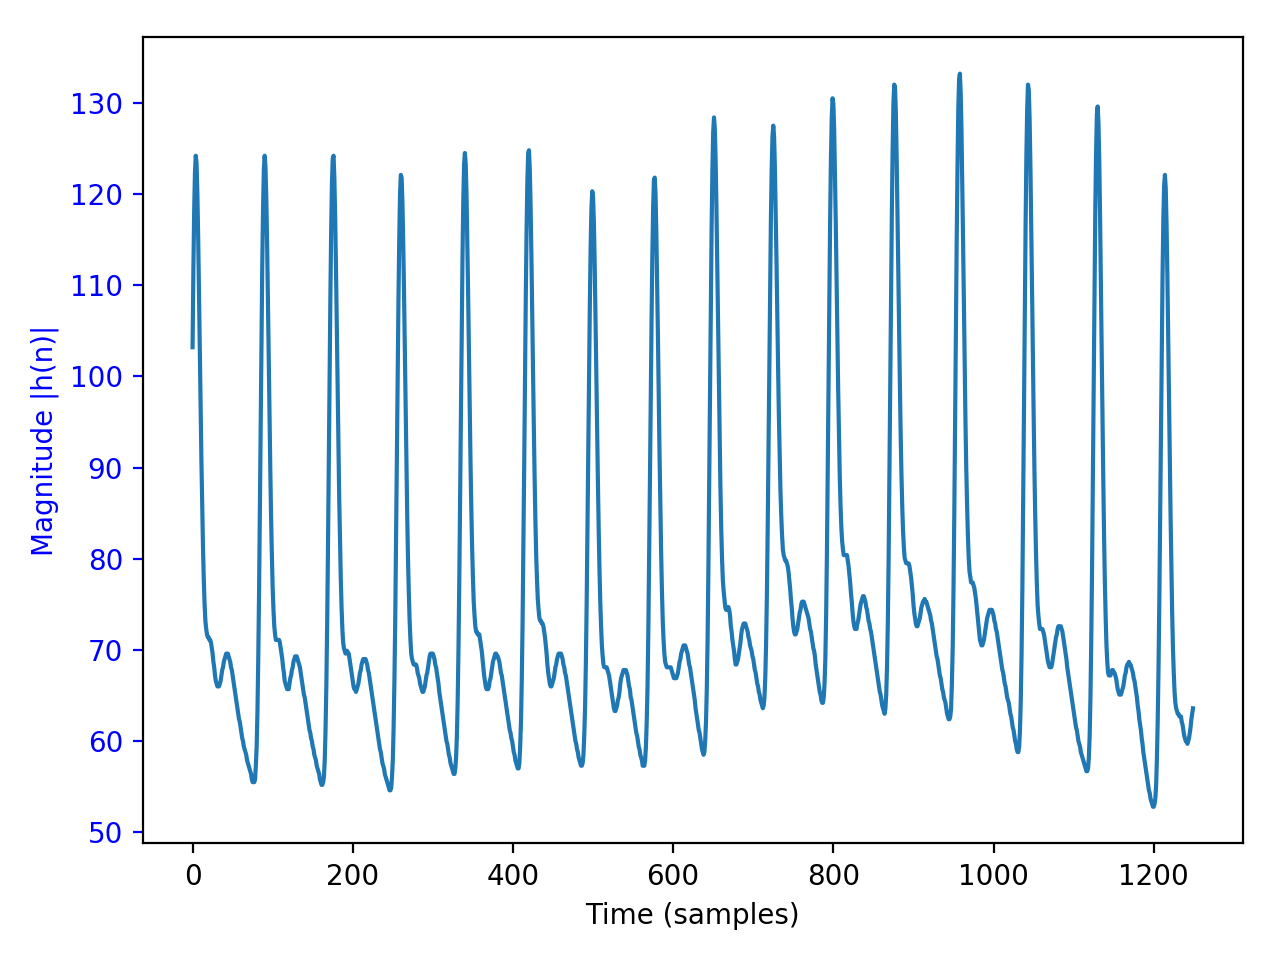

In [11]:
time_plot(time_windows[333])

This 10 second frame contains 16 peaks, which corrisponds to a an estimated heart rate of 96 bpm. High, but not unreasonable for a child. Lets now do some fourier domain analysis. We will create a new multi-dimentional array that takes the fft of each of the windows in our current windowing array.

In [12]:
freq_windows = [fft(window) for window in time_windows]

Now lets examine a frequency window magnitude plot to ensure our operation matches the results above.

<IPython.core.display.Javascript object>


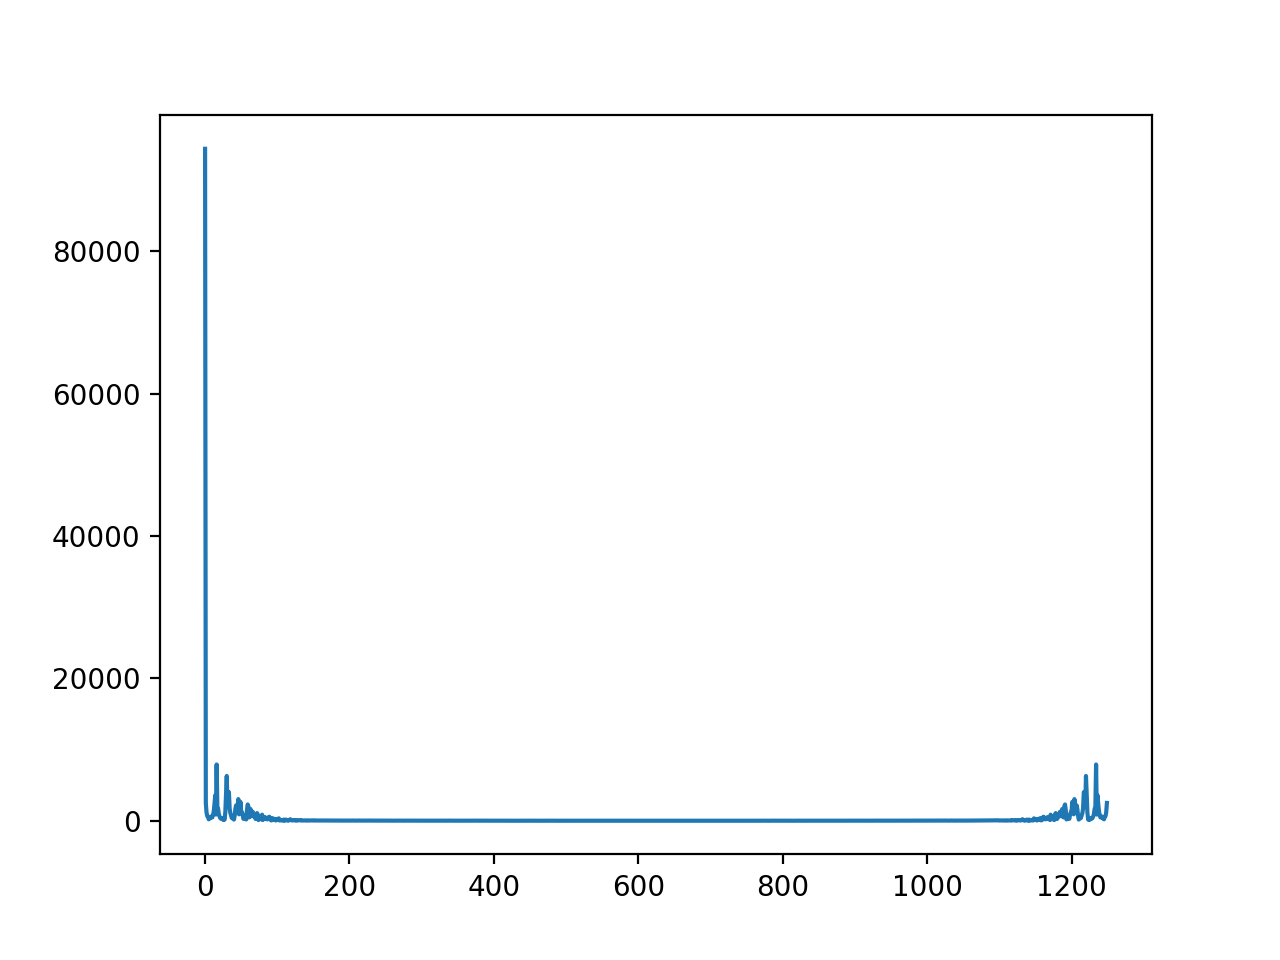

In [13]:
plt.figure(101)
plt.plot(abs(freq_windows[333]))

While on zooming in we can see that our plot is probably correct, the first view of the plot is overwhelmed by the DC component and also gives us much more information than we actually need, making interpretation difficult. We can get rid of the DC component of our signals by normalizing the time windows as they come in. Lets alter our equations to remove the dc component of the signal. Lets also add an x axis to the frequency chat that shows the proper frequencies in **beats per minuite**. Since we are currently evaluating only 10 seconds, we can achieve this by multiplying the sample indicies by six.

<IPython.core.display.Javascript object>


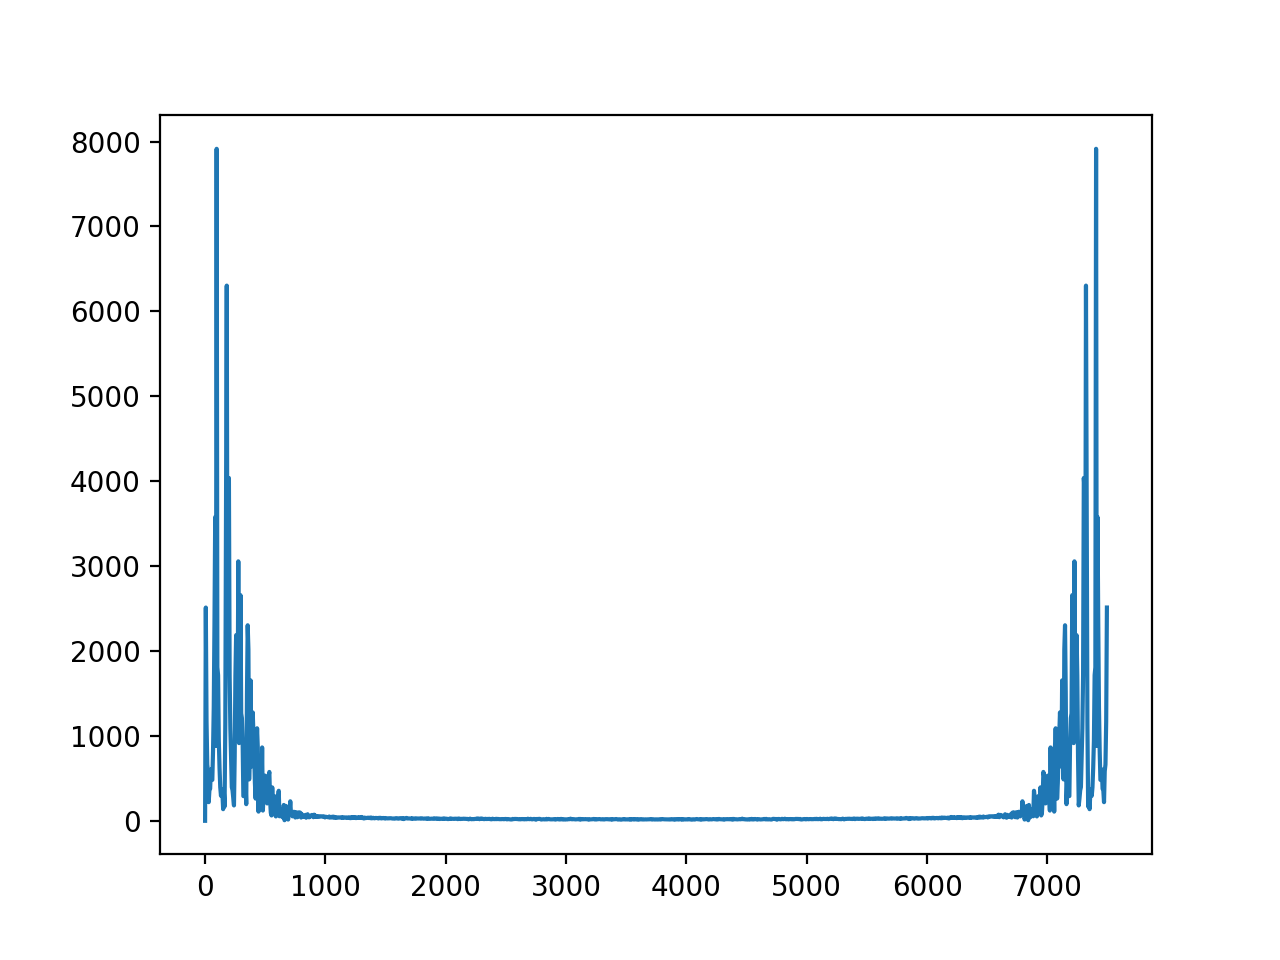

In [14]:
# normalize windows before taking fft
freq_windows_normed = [fft(window - (sum(window)/float(len(window)))) for window in time_windows]

# create x axis that corrisponds to bpm
bpm_axis = np.arange(len(freq_windows_normed[333]))*6

# plot
plt.figure(107)
plt.plot(bpm_axis, abs(freq_windows_normed[333]))


Now we have we have the normalized frequency components on a proper axis, but we still have much more information than we need. Since there is virtually no information above 1000 bpm lets only look at the part of the signal below that. Since our axis is currently 6 bpm/sample we need to take the first 1000 bpm / 6 samples from the arrays, ~167 samples.

<IPython.core.display.Javascript object>


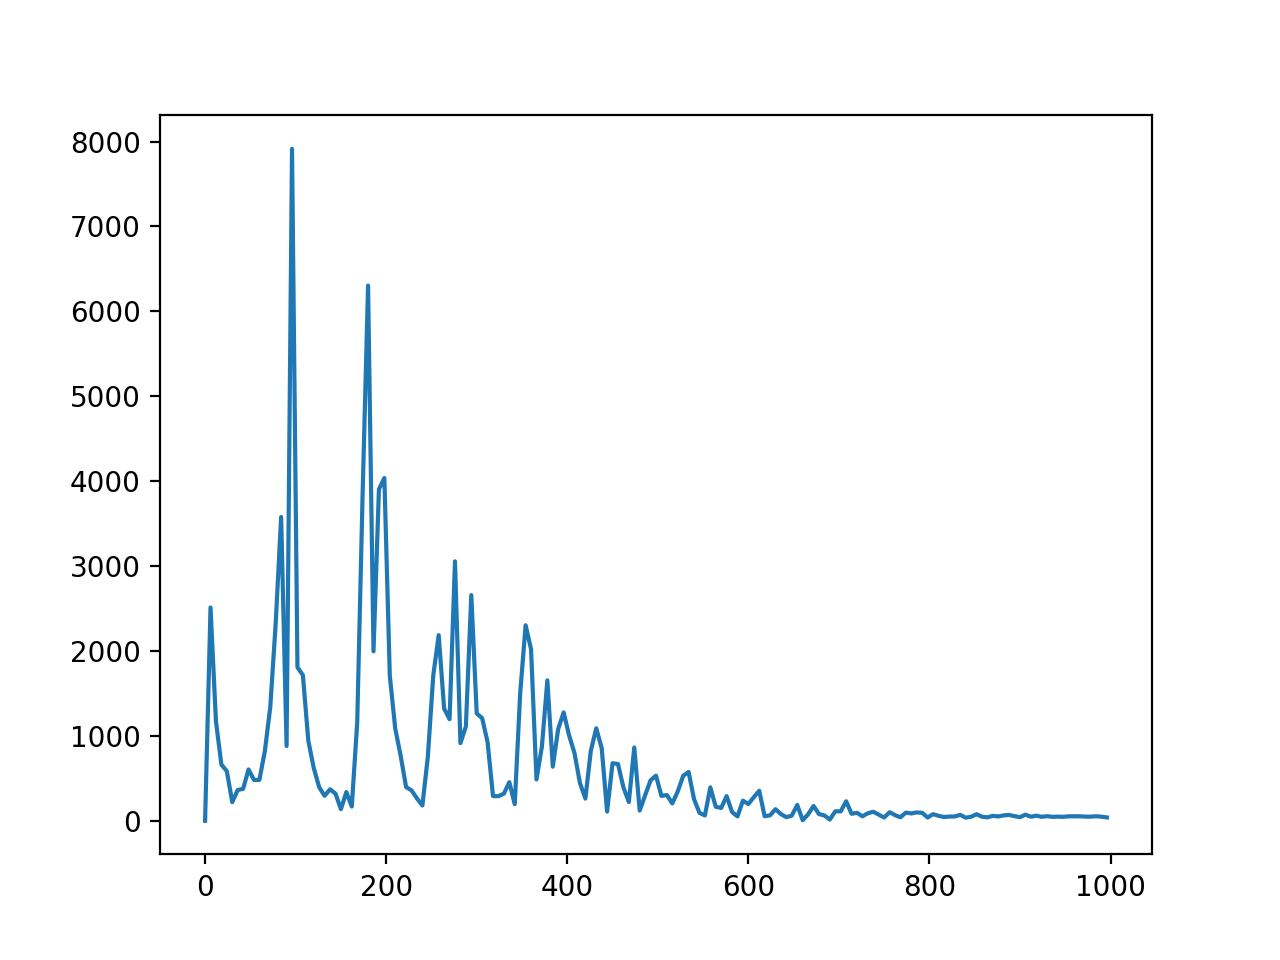

In [15]:
plt.figure(108)
plt.plot(bpm_axis[:167], abs(freq_windows_normed[333][:167]))


Now we can see in much better detail what is going on. The fundemental frequency appears to be around 100 bpm. This matches our observation in the time domain of 16 cycles in 10 seconds. Now that we have a good view of our frequency chart, lets examine a few plots to make sure we are getting the desired behaviour.

### Window 111

<IPython.core.display.Javascript object>


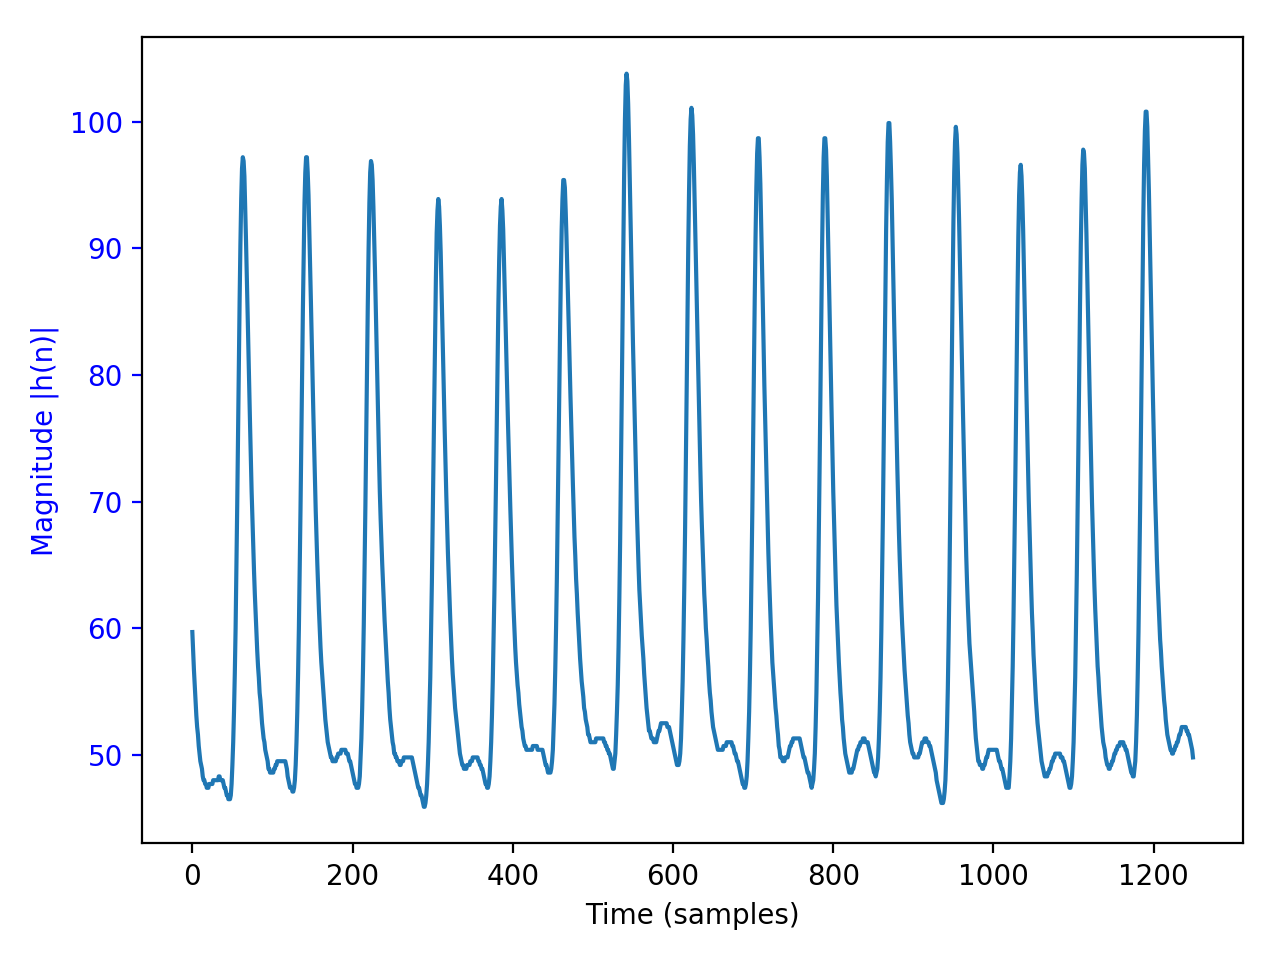

<IPython.core.display.Javascript object>


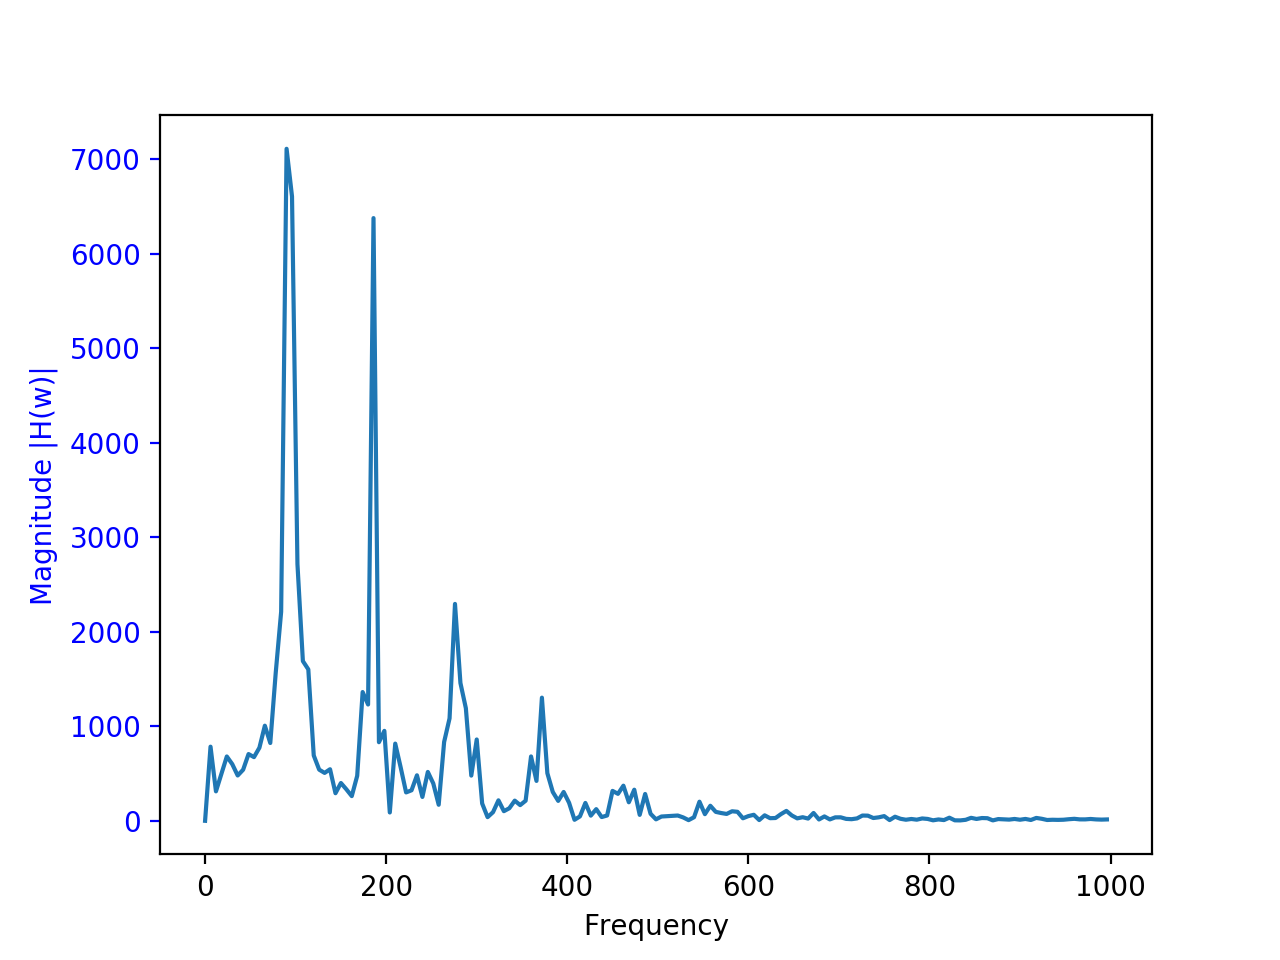

In [16]:
# isolate the freq domain to 1000 bpm max
bpm_iso_axis = bpm_axis[:167]
freq_windows_iso = [abs(window[:167]) for window in freq_windows_normed]

time_plot(time_windows[111])
mag_phase_plot(freq_windows_iso[111], bpm_iso_axis, phase_off=True)

We can see that the 10 second time slot contains 15 peaks which translates to roughly 90 bpm. Looking at our frequency chart we see that the main peak occours at roughly 90 bpm.

### Window 222

<IPython.core.display.Javascript object>


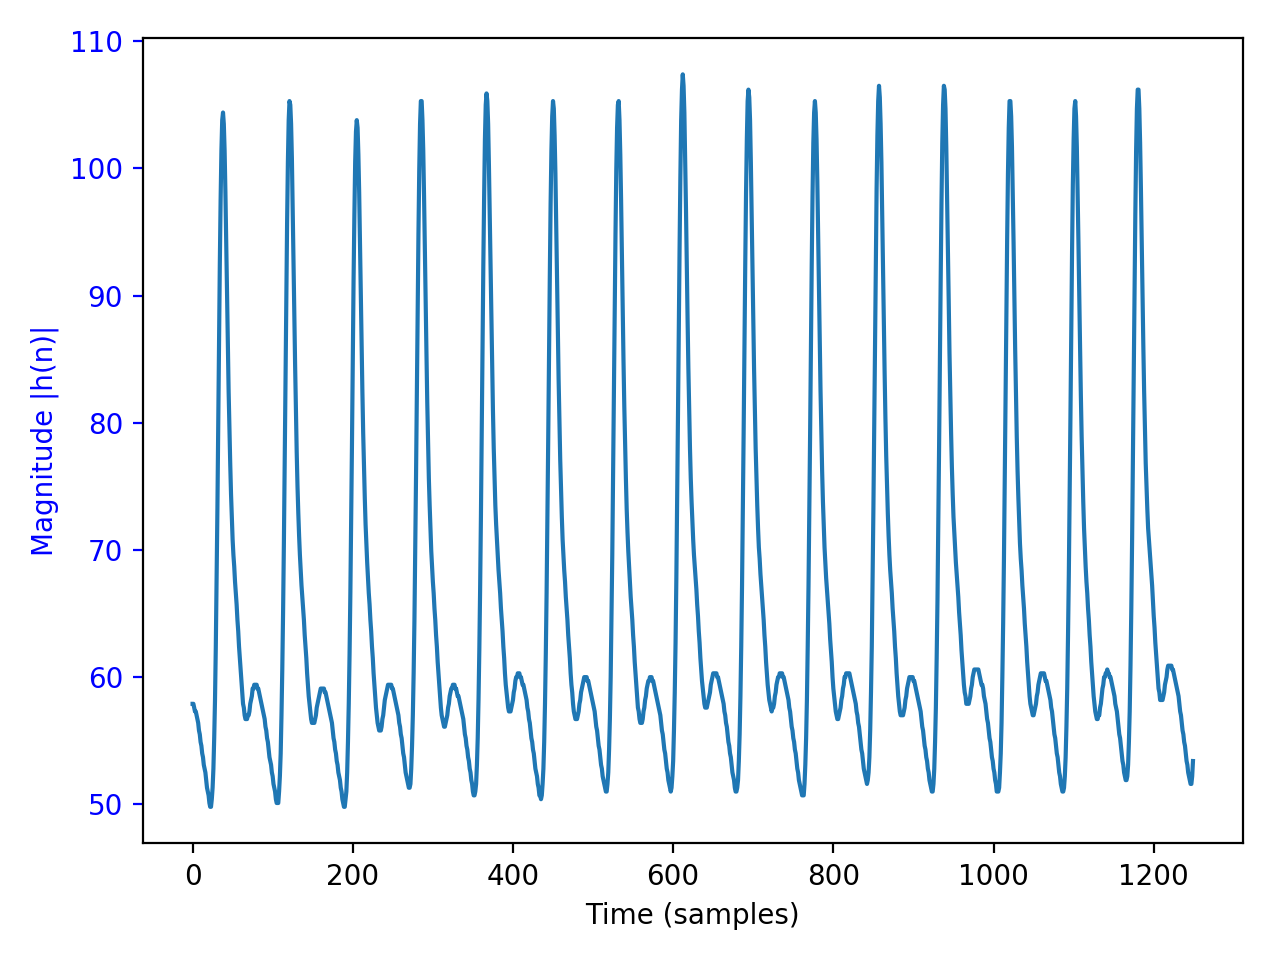

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


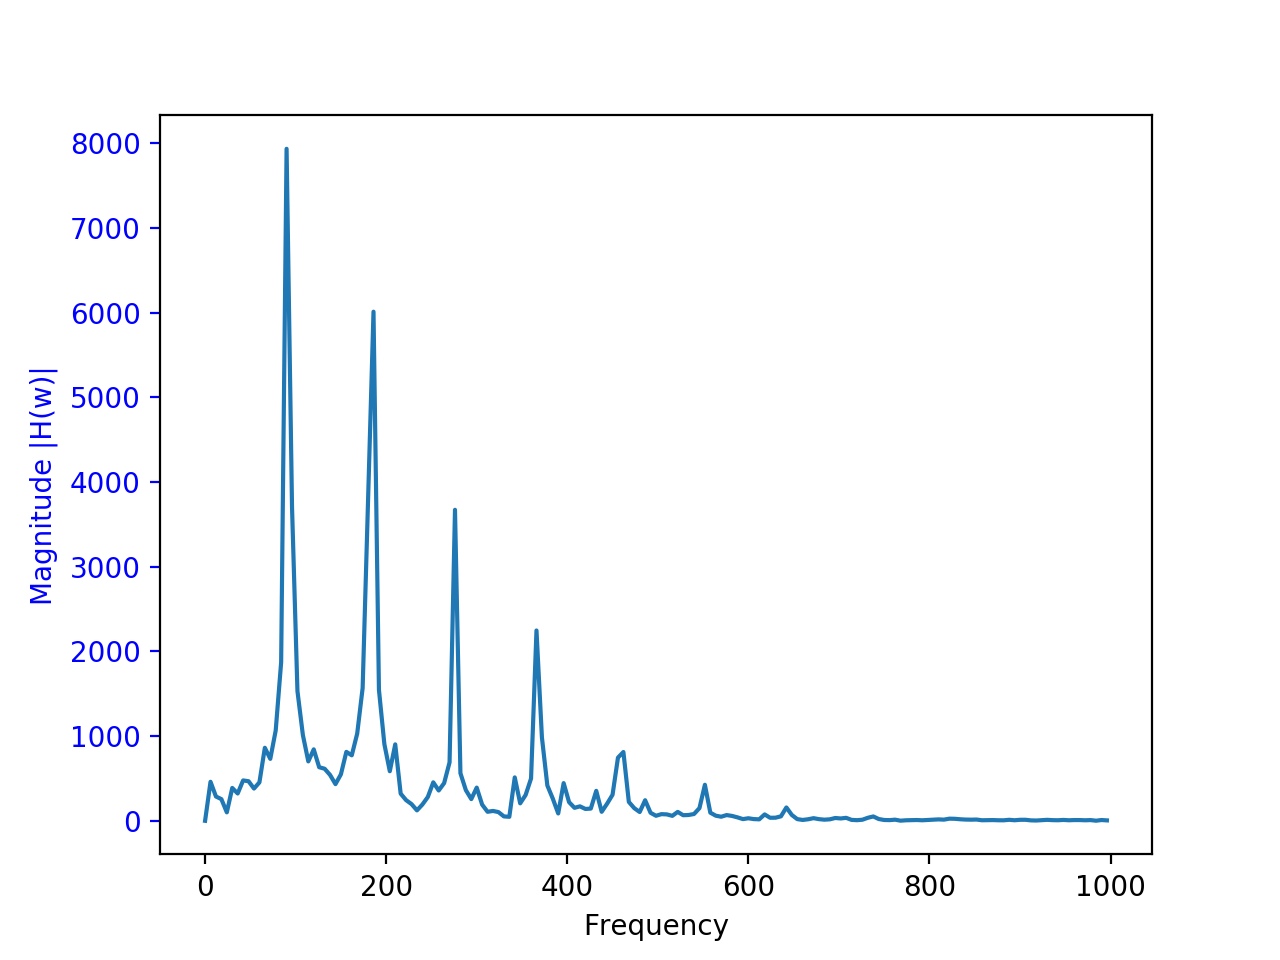

In [17]:
time_plot(time_windows[222])
mag_phase_plot(freq_windows_iso[222], bpm_iso_axis, phase_off=True)

We can see that the 10 second time slot contains 15 peaks which translates to roughly 90 bpm. Looking at our frequency chart we see that the main peak occours at roughly 90 bpm.

### Window 307

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


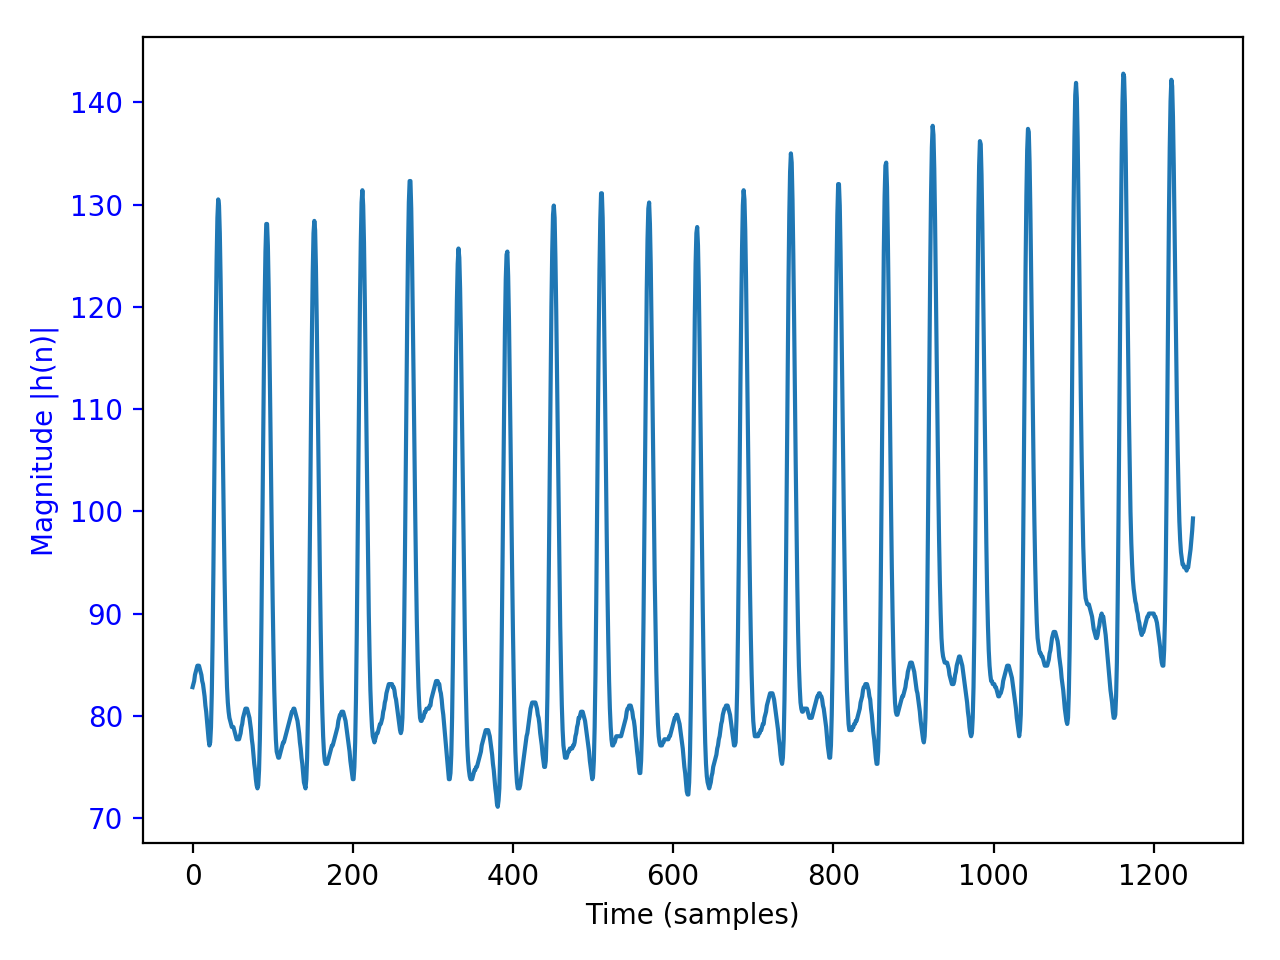

<IPython.core.display.Javascript object>


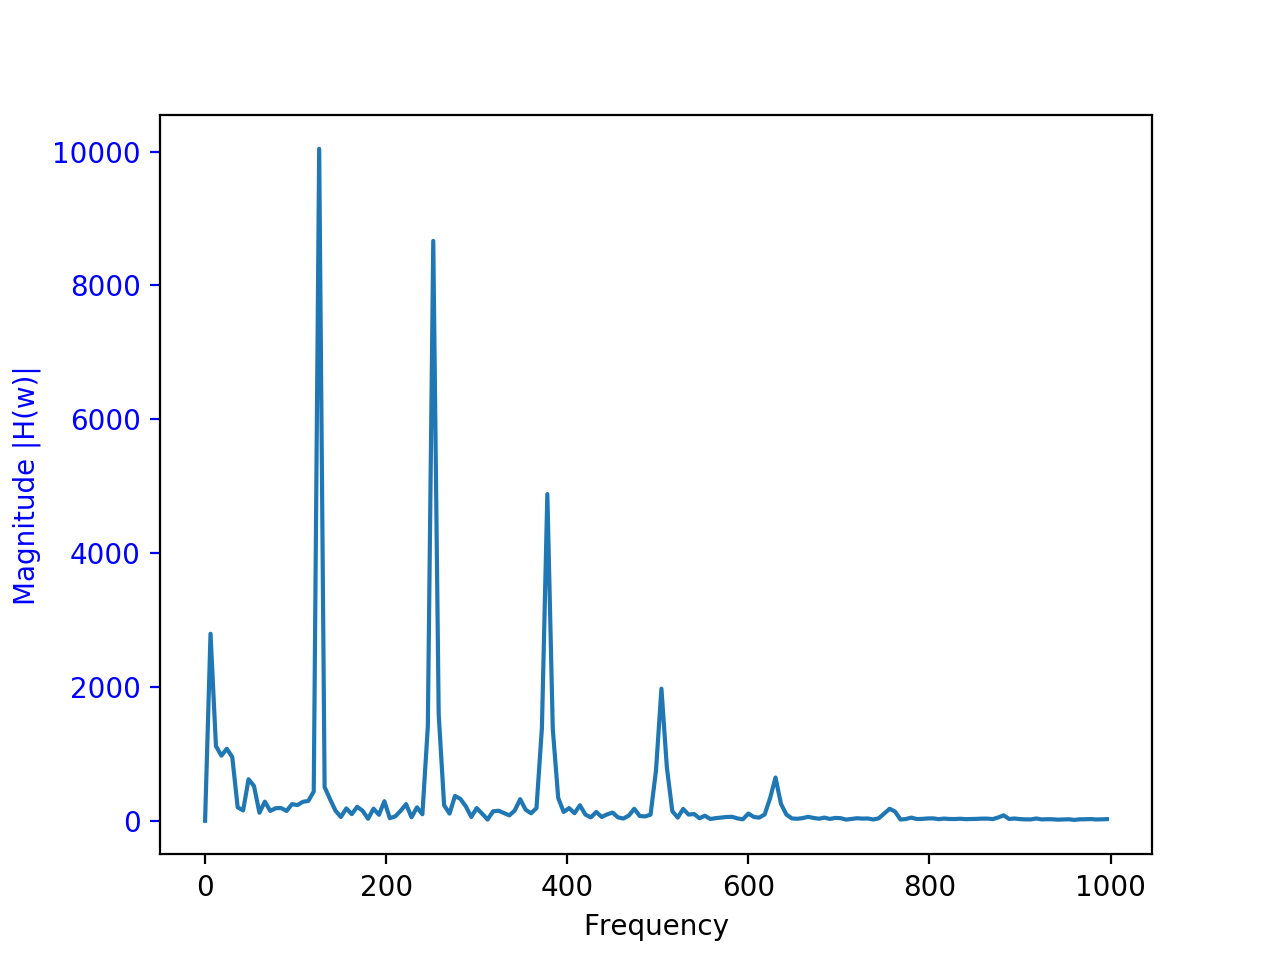

In [18]:
time_plot(time_windows[307])
mag_phase_plot(freq_windows_iso[307], bpm_iso_axis, phase_off=True)

In this window we can see that the 10 second time slot contains 21 peaks which translates to roughly 126 bpm. Looking at our frequency chart we see that the main peak occours at roughly 126 bpm.

Over all it looks like our frequency domain chat is accurately representing the time domain windows.

Now that we have found the right way to view our data we can view it across the time scale. Lets create a 3d plot that will map the freqency domain and the time domain.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


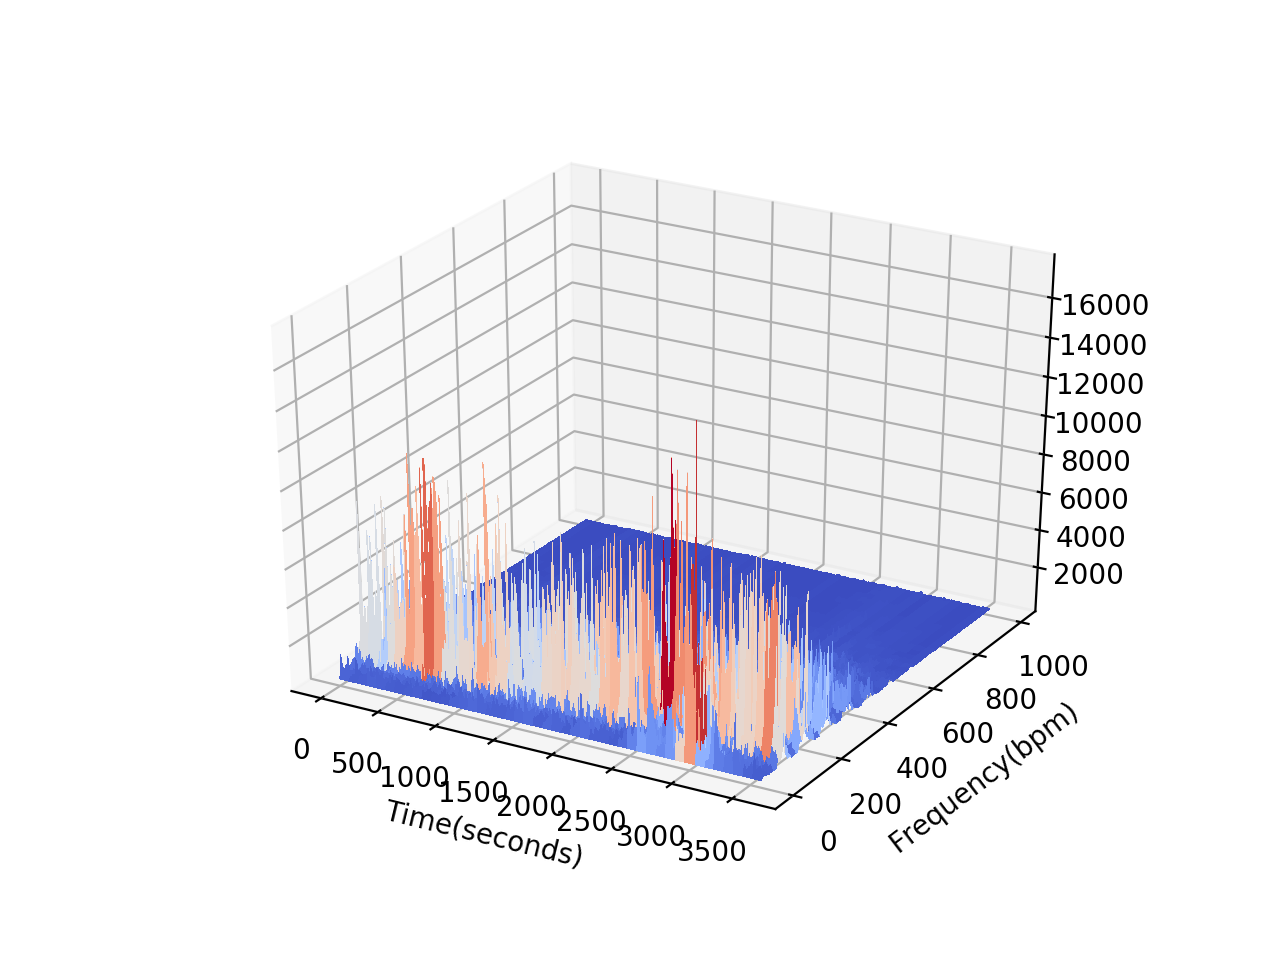

In [19]:
# isolate the freq domain to 1000 bpm max
bpm_iso_axis = bpm_axis[:167]
freq_windows_iso = [abs(window[:167]) for window in freq_windows_normed]

# create a time axis
t_axis = np.arange(len(freq_windows_iso))*10

# make xy mesh for 3d plot
x, y = np.meshgrid(t_axis, bpm_iso_axis)

# generate 3d plot
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('Time(seconds)')
ax.set_ylabel('Frequency(bpm)')
surf = ax.plot_surface(x, y, np.array(freq_windows_iso).T, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

From this we can see that all through the timespan, our frequency components remain fairly consistent. Clear patterns emerge, whit a fundemental frequency around 100 bpm, and  many lower magnitude harmonics. While much of the variation in the signal is slight towards the end of time signal there are some extremly strong low fewquency components of the signal that were not removed with normalization. This implies that they are not dc components and should probably not be ignored. I think the best way to move forward isolating the heart rate is to grab the maximum amplitude frequency component from each time stamp. Lets examine our results after doing this.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


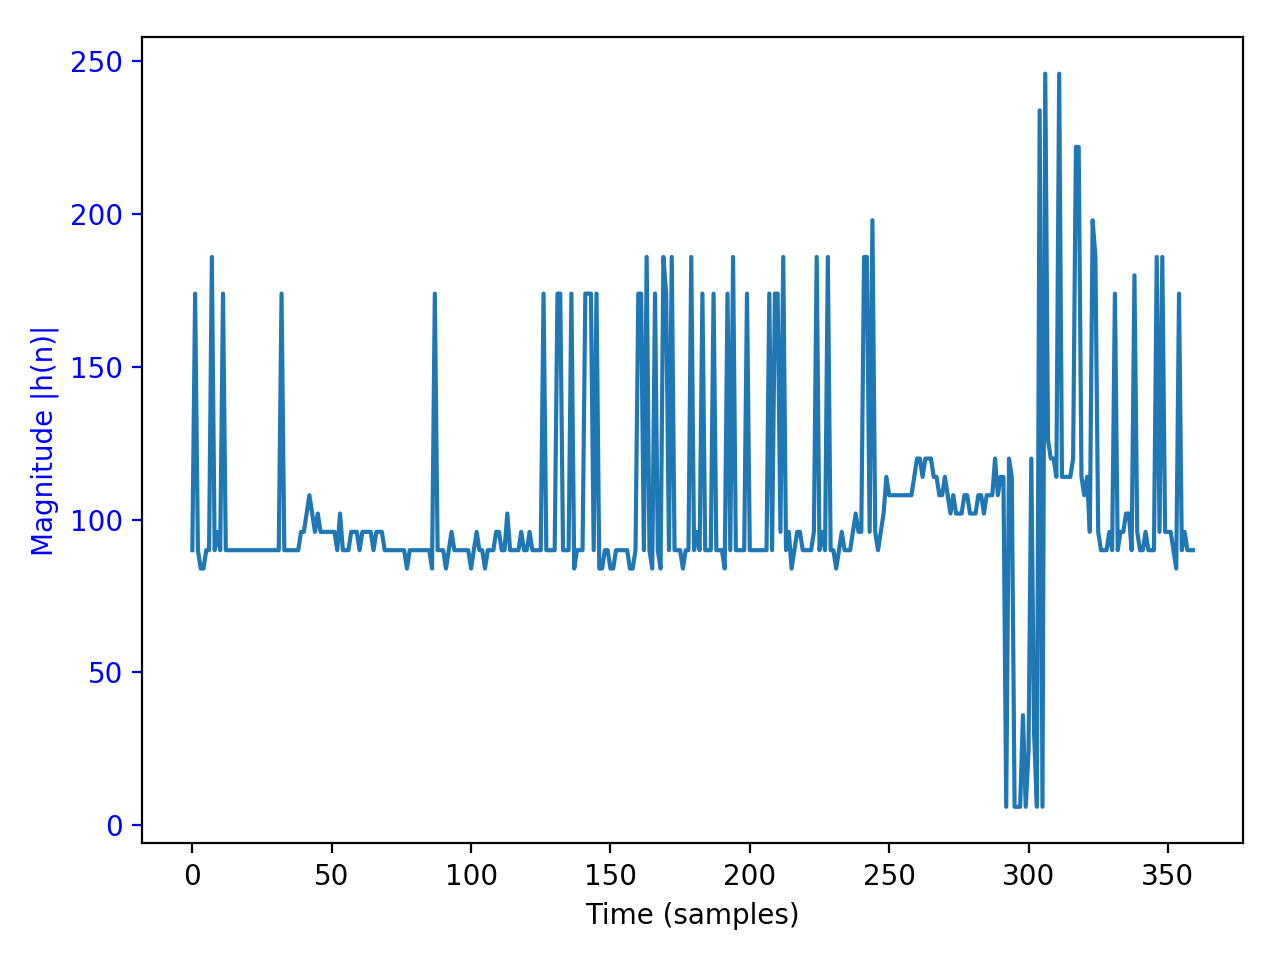

In [21]:
hr = [bpm_iso_axis[np.argmax(window)] for window in freq_windows_iso]
time_plot(hr)

We can see there is a lot of noise in this signal, but over all it represents a reasonable view of the heart rate over time. It tracks between 80 and 120 bpm, a pretty normal heart rate for a little human. The changes in frequency are so sporatic that it is likely just noise and not actual changes in heart rate. 